In [1]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Changing directory to Session 7 project folder
% cd /content/gdrive/My Drive/TSAI-EVA-7.0/08_Advanced_Training_Concepts/

/content/gdrive/My Drive/TSAI-EVA-7.0/08_Advanced_Training_Concepts


In [3]:
!pip install albumentations==0.4.6

In [4]:
import torch.optim as optim
import torch.nn as nn

# PyTorch_Vision 
Accessing the repository with modular main.py, utils.py and model files.

In [5]:
! git clone https://github.com/lavanyanemani96/PyTorch_Vision
% cd PyTorch_Vision/

Cloning into 'PyTorch_Vision'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 80 (delta 37), reused 65 (delta 22), pack-reused 0
Unpacking objects: 100% (80/80), done.
/content/gdrive/My Drive/TSAI-EVA-7.0/08_Advanced_Training_Concepts/PyTorch_Vision


# Data

In [6]:
from main import * 

In [7]:
from utils import * 

In [8]:
Cifar10_train = dataset(A.Compose([ToTensorV2()]), True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
mu, sigma = mean_std_cifar10(Cifar10_train)

In [10]:
UnNorm = UnNormalize(mu, sigma) 

In [11]:
imgs = [item[0] for item in Cifar10_train] 
labels = [item[1] for item in Cifar10_train]

imgs = torch.stack(imgs, dim=0).numpy()

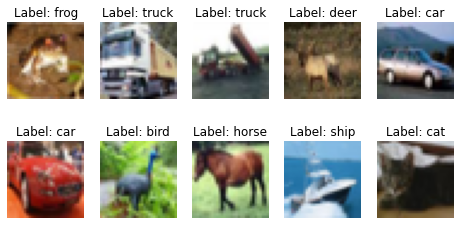

In [12]:
plot_grid(imgs, labels)

## Train/Test 

In [13]:
transforms_train = augmentation('Train', mu, sigma)
transforms_test = augmentation('Test', mu, sigma)

train_set = dataset(transforms_train, True)
test_set = dataset(transforms_test, False)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
device, use_cuda = device()
batch_size = 128

In [15]:
train_loader = data_loader(train_set, args(batch_size, device, use_cuda)) 
test_loader = data_loader(test_set, args(batch_size, device, use_cuda))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# ResNet

In [16]:
from models.resnet import ResNet18

In [17]:
model = ResNet18().to(device)

In [18]:
show_summary(model, device=device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 36, 36]           1,728
       BatchNorm2d-2           [-1, 64, 36, 36]             128
            Conv2d-3           [-1, 64, 36, 36]          36,864
       BatchNorm2d-4           [-1, 64, 36, 36]             128
            Conv2d-5           [-1, 64, 36, 36]          36,864
       BatchNorm2d-6           [-1, 64, 36, 36]             128
        BasicBlock-7           [-1, 64, 36, 36]               0
            Conv2d-8           [-1, 64, 36, 36]          36,864
       BatchNorm2d-9           [-1, 64, 36, 36]             128
           Conv2d-10           [-1, 64, 36, 36]          36,864
      BatchNorm2d-11           [-1, 64, 36, 36]             128
       BasicBlock-12           [-1, 64, 36, 36]               0
           Conv2d-13          [-1, 128, 19, 19]          73,728
      BatchNorm2d-14          [-1, 128,

In [19]:
EPOCHS = 20
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.05, epochs=EPOCHS, steps_per_epoch=len(train_loader))

In [21]:
results = train_model(model, device, train_args(criterion, optimizer, scheduler), train_loader, test_loader, EPOCHS)

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=1.1802575588226318 Batch_id=390 Accuracy=41.11: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0101, Accuracy: 5390/10000 (53.90%)

EPOCH: 1


Loss=0.9105045199394226 Batch_id=390 Accuracy=59.05: 100%|██████████| 391/391 [03:04<00:00,  2.12it/s]



Test set: Average loss: 0.0081, Accuracy: 6343/10000 (63.43%)

EPOCH: 2


Loss=0.7933289408683777 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [03:02<00:00,  2.14it/s]



Test set: Average loss: 0.0083, Accuracy: 6489/10000 (64.89%)

EPOCH: 3


Loss=0.7567934393882751 Batch_id=390 Accuracy=72.75: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0058, Accuracy: 7413/10000 (74.13%)

EPOCH: 4


Loss=0.5510321259498596 Batch_id=390 Accuracy=76.38: 100%|██████████| 391/391 [03:02<00:00,  2.14it/s]



Test set: Average loss: 0.0060, Accuracy: 7341/10000 (73.41%)

EPOCH: 5


Loss=0.6900001168251038 Batch_id=390 Accuracy=78.66: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0068, Accuracy: 7306/10000 (73.06%)

EPOCH: 6


Loss=0.35625725984573364 Batch_id=390 Accuracy=80.73: 100%|██████████| 391/391 [03:02<00:00,  2.14it/s]



Test set: Average loss: 0.0051, Accuracy: 7893/10000 (78.93%)

EPOCH: 7


Loss=0.500881552696228 Batch_id=390 Accuracy=82.33: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0044, Accuracy: 8150/10000 (81.50%)

EPOCH: 8


Loss=0.28307539224624634 Batch_id=390 Accuracy=84.10: 100%|██████████| 391/391 [03:03<00:00,  2.14it/s]



Test set: Average loss: 0.0048, Accuracy: 8086/10000 (80.86%)

EPOCH: 9


Loss=0.5165377855300903 Batch_id=390 Accuracy=85.39: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0047, Accuracy: 8117/10000 (81.17%)

EPOCH: 10


Loss=0.35801881551742554 Batch_id=390 Accuracy=86.48: 100%|██████████| 391/391 [03:03<00:00,  2.14it/s]



Test set: Average loss: 0.0037, Accuracy: 8428/10000 (84.28%)

EPOCH: 11


Loss=0.48848551511764526 Batch_id=390 Accuracy=87.17: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0044, Accuracy: 8256/10000 (82.56%)

EPOCH: 12


Loss=0.3511068522930145 Batch_id=390 Accuracy=88.01: 100%|██████████| 391/391 [03:03<00:00,  2.14it/s]



Test set: Average loss: 0.0048, Accuracy: 8173/10000 (81.73%)

EPOCH: 13


Loss=0.3243023753166199 Batch_id=390 Accuracy=89.13: 100%|██████████| 391/391 [03:03<00:00,  2.14it/s]



Test set: Average loss: 0.0039, Accuracy: 8479/10000 (84.79%)

EPOCH: 14


Loss=0.2742513120174408 Batch_id=390 Accuracy=89.81: 100%|██████████| 391/391 [03:03<00:00,  2.14it/s]



Test set: Average loss: 0.0056, Accuracy: 7943/10000 (79.43%)

EPOCH: 15


Loss=0.36127573251724243 Batch_id=390 Accuracy=90.33: 100%|██████████| 391/391 [03:02<00:00,  2.14it/s]



Test set: Average loss: 0.0033, Accuracy: 8688/10000 (86.88%)

EPOCH: 16


Loss=0.16804663836956024 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [03:02<00:00,  2.14it/s]



Test set: Average loss: 0.0039, Accuracy: 8534/10000 (85.34%)

EPOCH: 17


Loss=0.21369759738445282 Batch_id=390 Accuracy=91.23: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0035, Accuracy: 8641/10000 (86.41%)

EPOCH: 18


Loss=0.22510726749897003 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [03:04<00:00,  2.12it/s]



Test set: Average loss: 0.0042, Accuracy: 8475/10000 (84.75%)

EPOCH: 19


Loss=0.1672838032245636 Batch_id=390 Accuracy=92.57: 100%|██████████| 391/391 [03:03<00:00,  2.13it/s]



Test set: Average loss: 0.0035, Accuracy: 8712/10000 (87.12%)



In [34]:
% cd ..
! ls

/content/gdrive/My Drive/TSAI-EVA-7.0/08_Advanced_Training_Concepts
 plots		  README.md
 PyTorch_Vision  'Session 8 - Advance Training Concepts.ipynb'


# Predictions

In [24]:
n_images = 200

test_images = [item[0] for item in test_loader.dataset] 
test_images = torch.stack(test_images[:n_images])
test_targets = torch.tensor(test_loader.dataset.targets[:n_images]).to(device)
test_predictions = model(test_images.to(device))

In [25]:
correct = classfication_result(test_predictions, test_targets, device, b=True)
wrong = classfication_result(test_predictions, test_targets, device, b=False)

## Correct Classifications

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


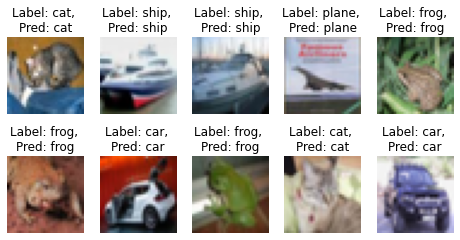

In [35]:
plot_grid(test_images[correct], test_targets[correct], UnNorm, test_predictions[correct])
plt.savefig('./plots/correct_classified.png')

## Wrong Classifications

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


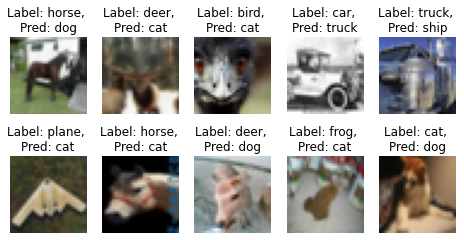

In [36]:
plot_grid(test_images[wrong], test_targets[wrong], UnNorm, test_predictions[wrong])
plt.savefig('./plots/misclassified.png')

# GradCam


In [39]:
heatmaps = gradcam(model, test_predictions, test_images, device)

## Correct Classifications GradCam 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


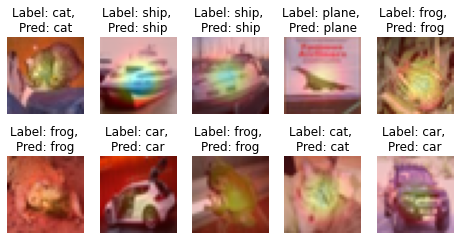

In [40]:
plot_grid_gradcam(test_images[correct], test_targets[correct], test_predictions[correct], heatmaps[correct], UnNorm)
plt.savefig('./plots/correct_classified_gradcam.png')

## Wrong Classifications GradCam 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


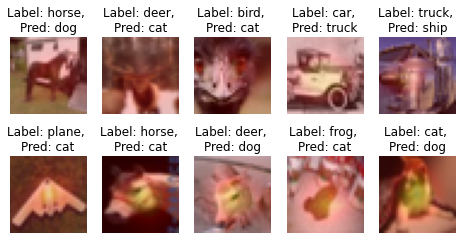

In [41]:
plot_grid_gradcam(test_images[wrong], test_targets[wrong], test_predictions[wrong], heatmaps[wrong], UnNorm)
plt.savefig('./plots/misclassified_gradcam.png')

# Loss/Accuracy Curves

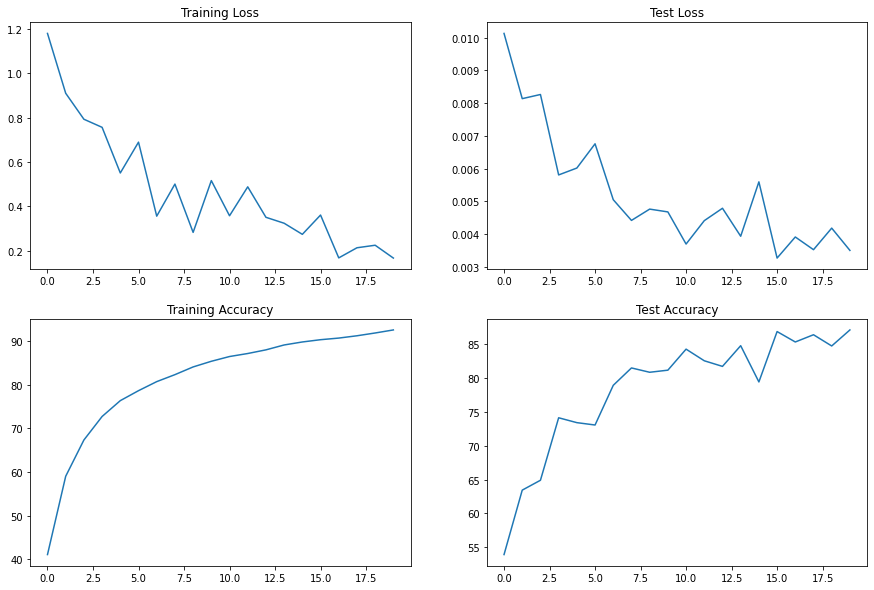

<Figure size 432x288 with 0 Axes>

In [42]:
plot_loss_accuracy(results)
plt.savefig('./plots/loss_accuracy.png')